# Mini-projet - Elections
*Basé sur Hands-on Data Preprocessing, R. Jafari, 2022*

**Ce TP est noté. Merci de lire attentivement le fichier instructions.pdf avant de commencer**

Nom étudiant 1: **Gombas**

Prénom étudiant 1: **Owen**

Nom étudiant 2: **Darmanger**

Prénom étudiant 2: **David**

## Préambule

### Imports

In [125]:
# packages standards
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
from typing import List, Dict, Tuple, Callable, Any
import re

In [126]:
# packages spécifiques
import matplotlib.image as mpimg
import seaborn as sns

### Data

In [127]:
DATA_FOLDER = os.path.join(".", "data")  # chemin relatif et nom du dossier "data"

RAW_FOLDER = os.path.join(
    DATA_FOLDER, "raw"
)  # chemin du dossier raw (ne devrait pas être changé): INPUT

PREPROCESSED_FOLDER = os.path.join(
    DATA_FOLDER, "preprocessed"
)  # chemin du dossier preprocessed (resultat du traitement raw): OUTPUT

MEDIA_FOLDER = os.path.join(
    DATA_FOLDER, "media"
)  # chemin du dossier media pour les illustrations de mise en page des notebooks

EXPLORATION_FOLDER = os.path.join(
    DATA_FOLDER, "exploration"
)  # chemin du dossier exploration pour les notebooks d'exploration

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import glob
from pandas_profiling import ProfileReport

In [129]:
# dictionnary with filename and header row
files = glob.glob(os.path.join(PREPROCESSED_FOLDER, "*.csv"))
files = [file for file in files if not file.startswith(os.path.join(PREPROCESSED_FOLDER, "clean_"))]
files

['./data/preprocessed/Education.csv',
 './data/preprocessed/PopulationEstimates.csv',
 './data/preprocessed/countypres_2000-2020.csv',
 './data/preprocessed/PovertyEstimates.csv',
 './data/preprocessed/Unemployment.csv']

In [130]:
def numerical_df(df: pd.DataFrame):
    return df.select_dtypes(include=np.number)

In [131]:
def show_heatmap(df: pd.DataFrame, title: str = "Correlation Heatmap", annot: bool = False):
    corr = df.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    plt.figure(figsize=(30, 20))
    plt.title(title, fontsize=20)
    sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=annot, center=0)
    plt.show()

In [132]:
def remove_correlated_columns(df: pd.DataFrame, threshold: float = 0.9):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return df.drop(to_drop, axis=1)

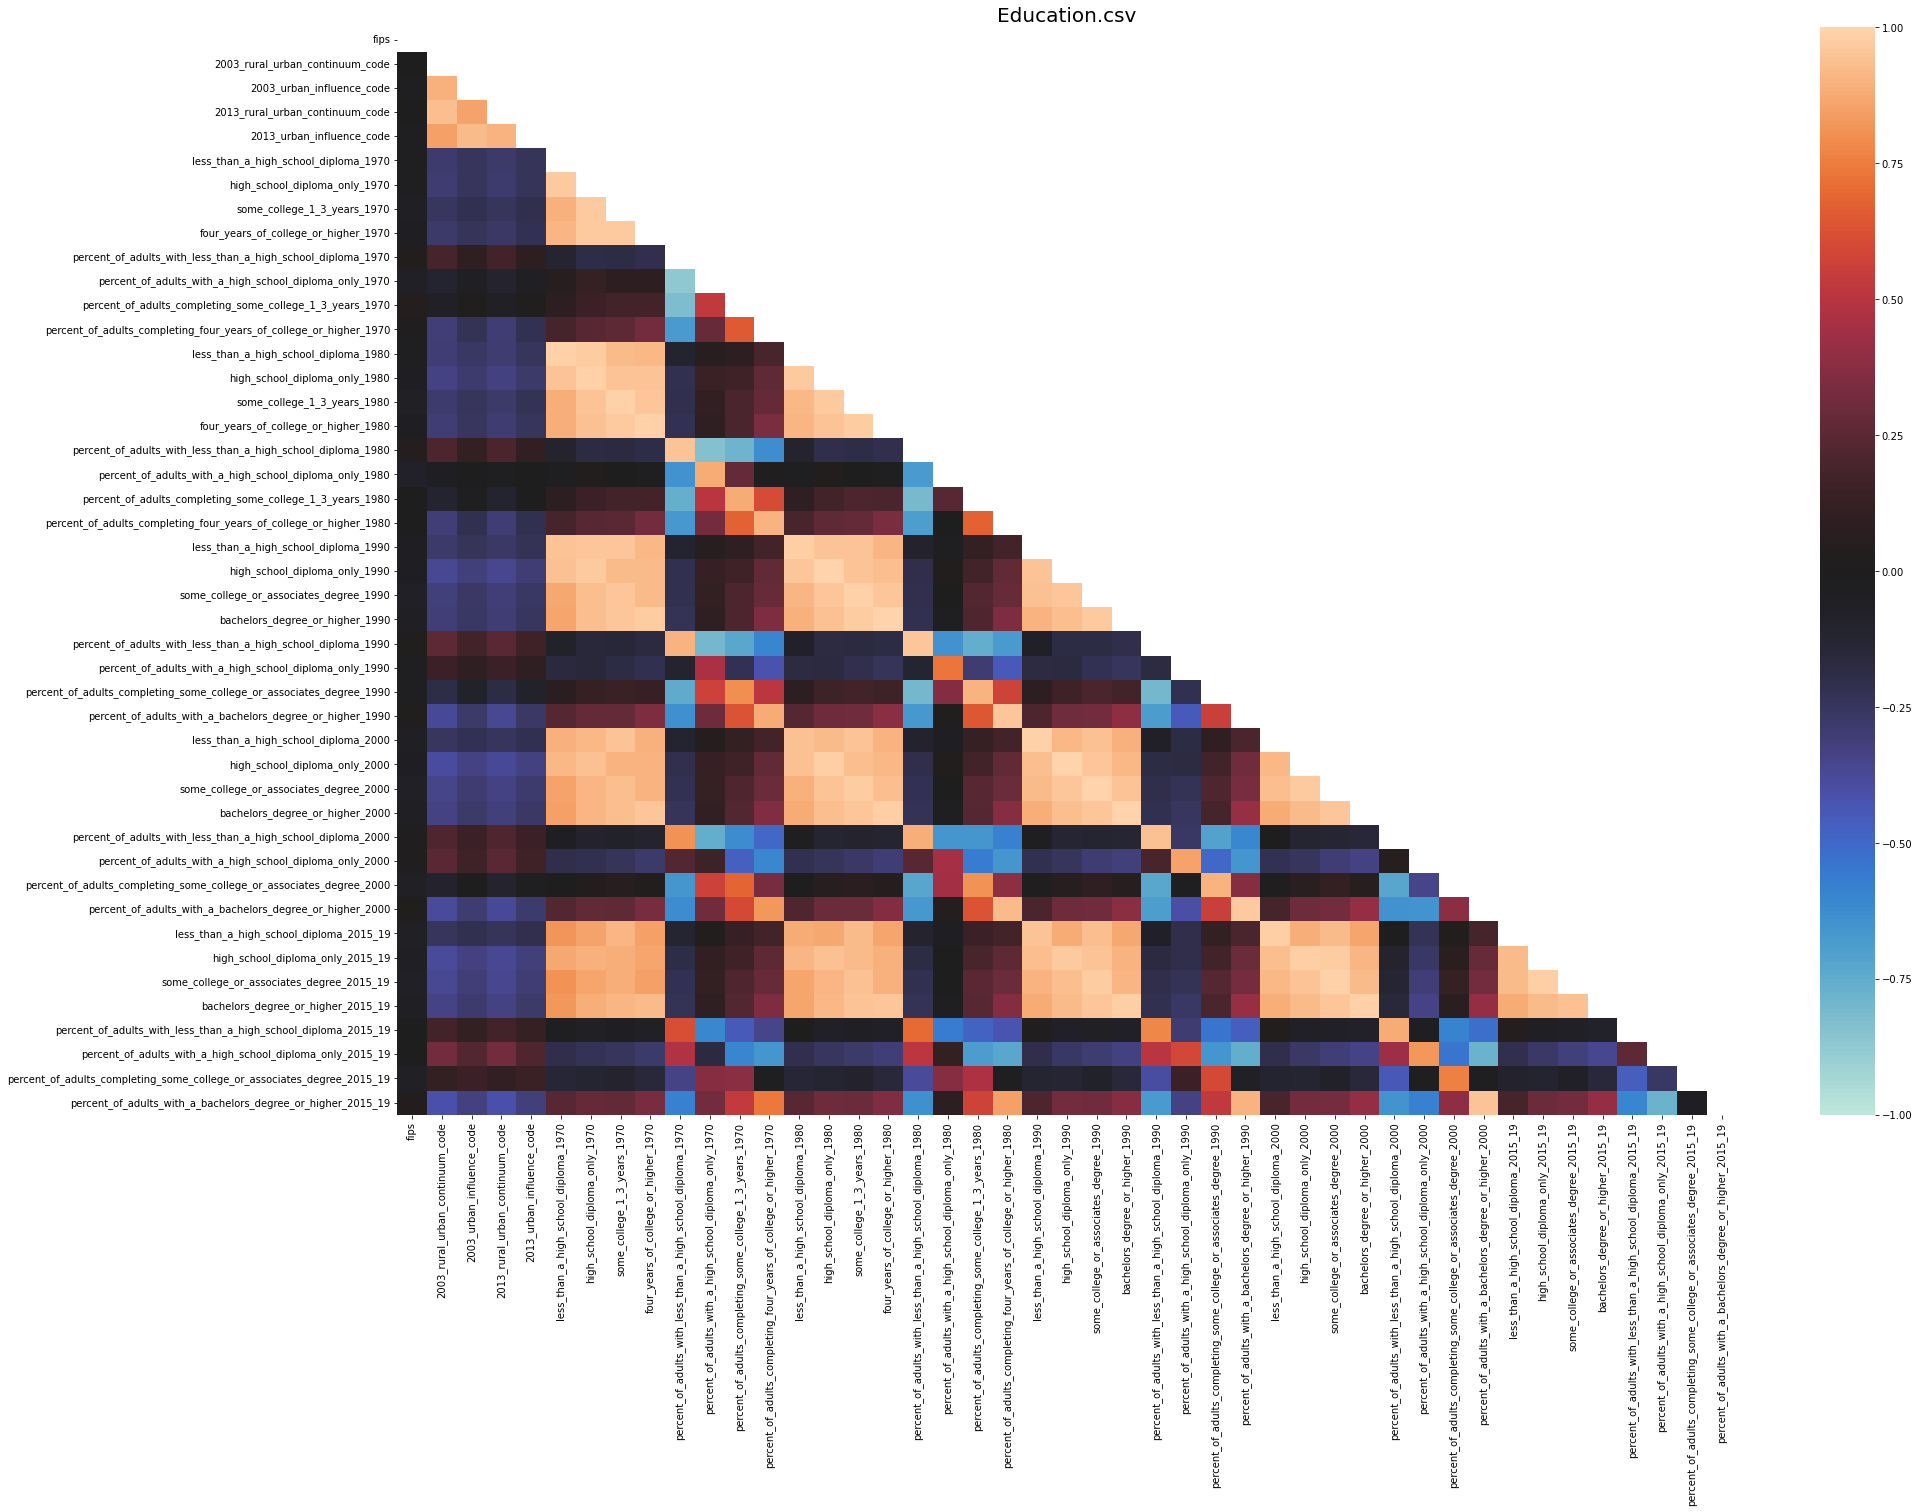

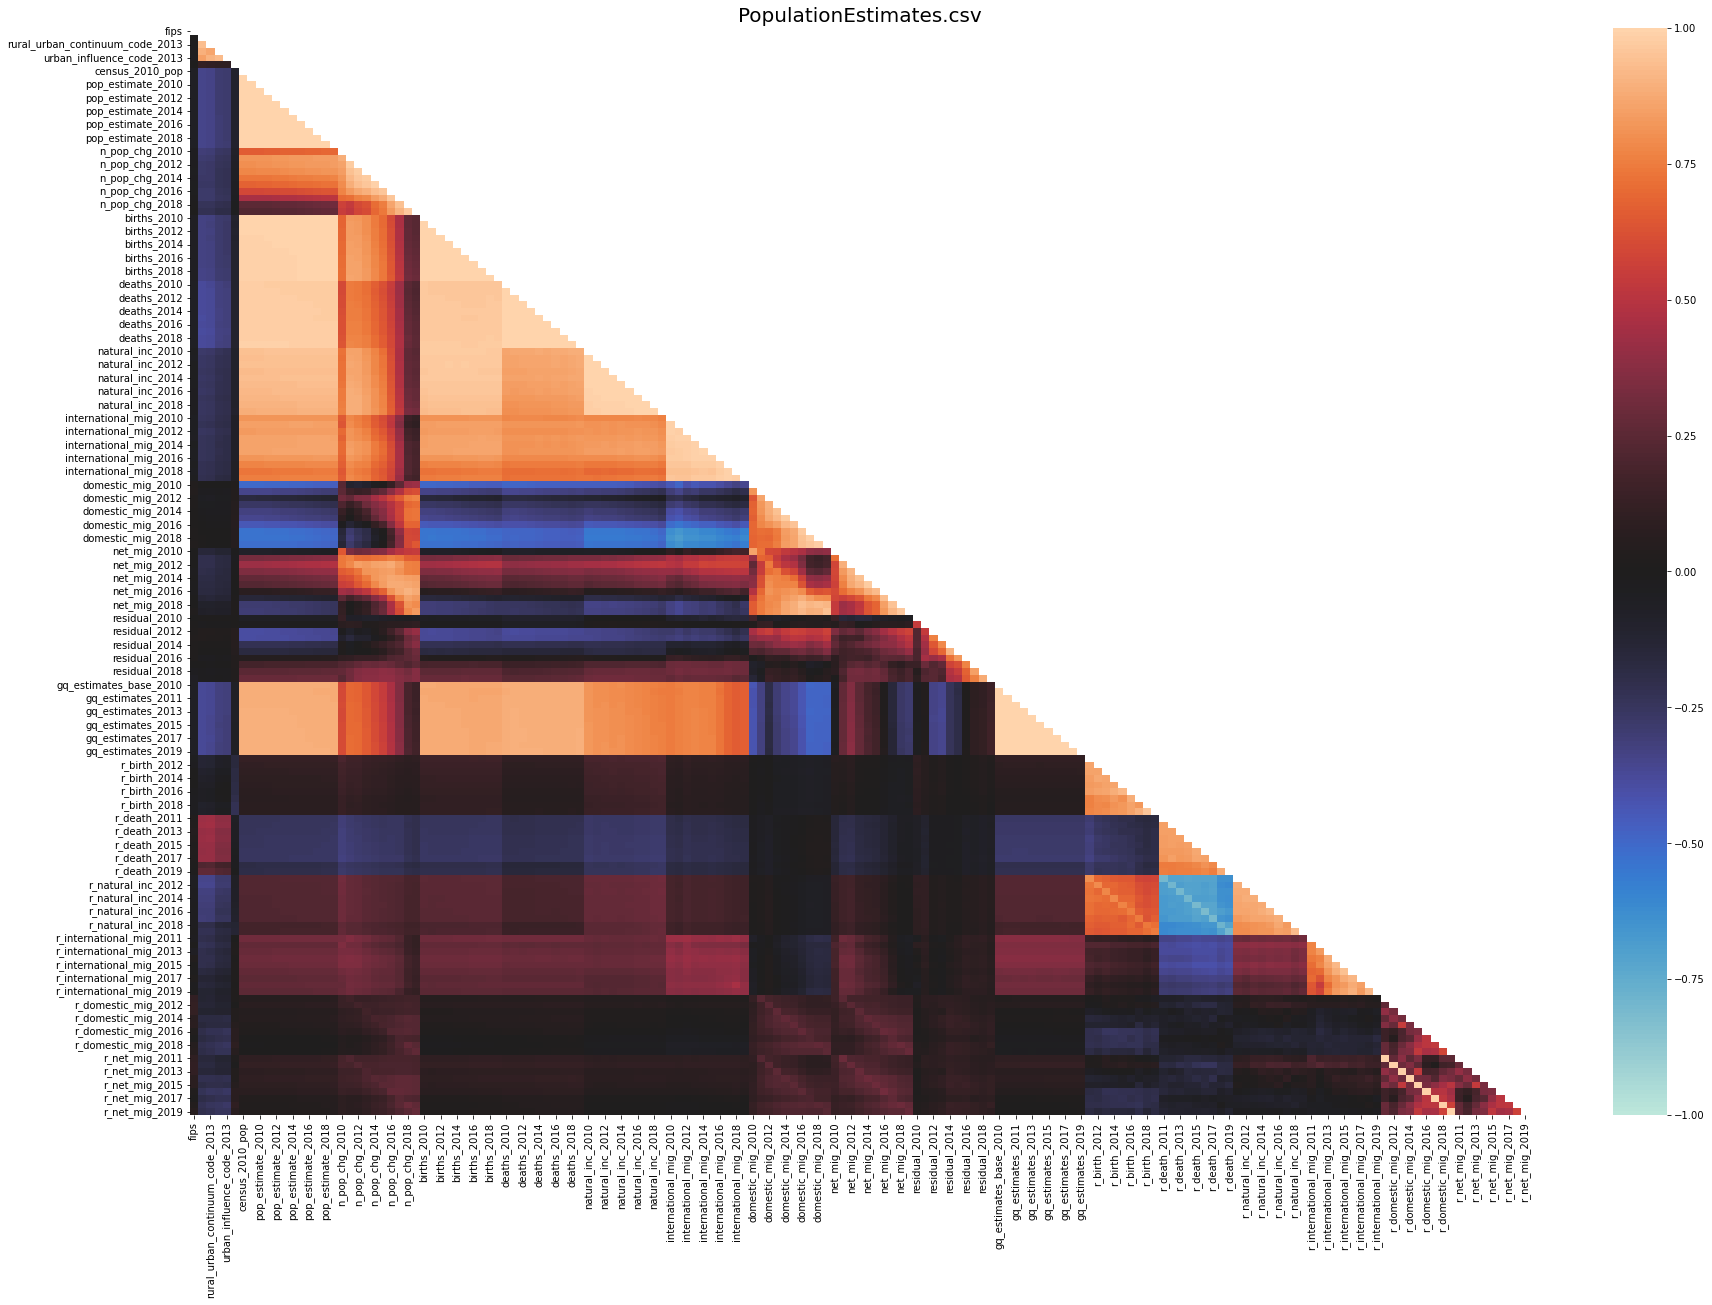

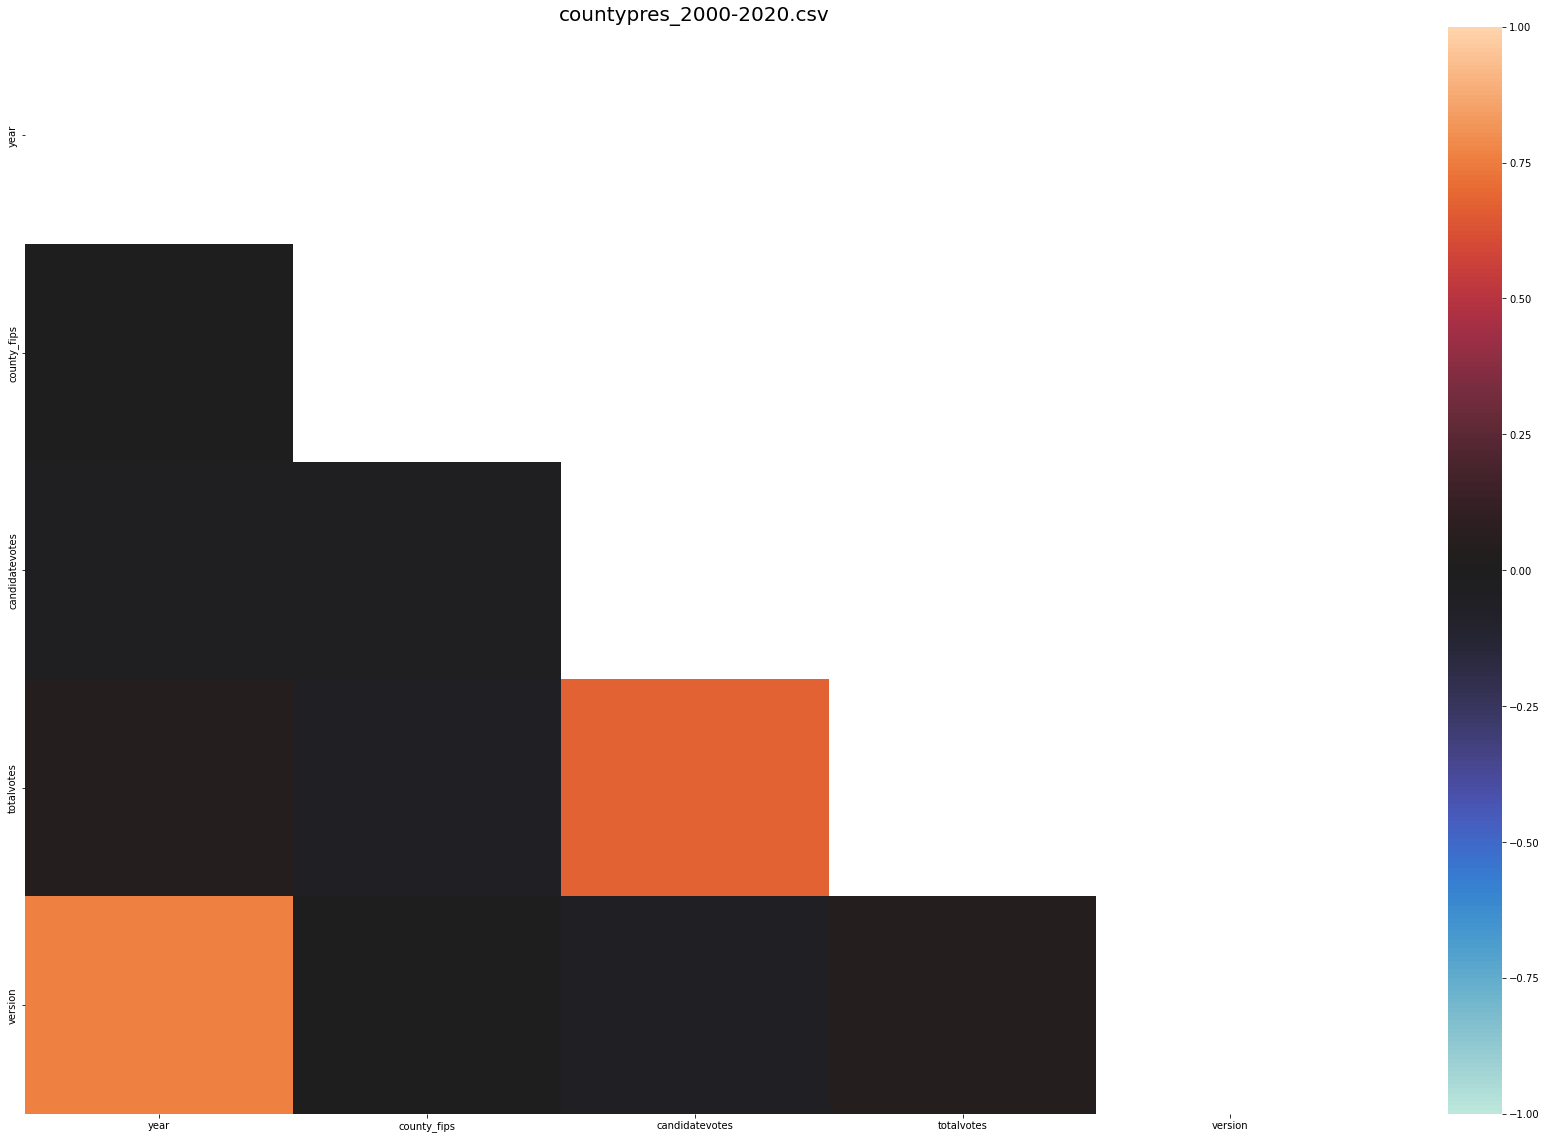

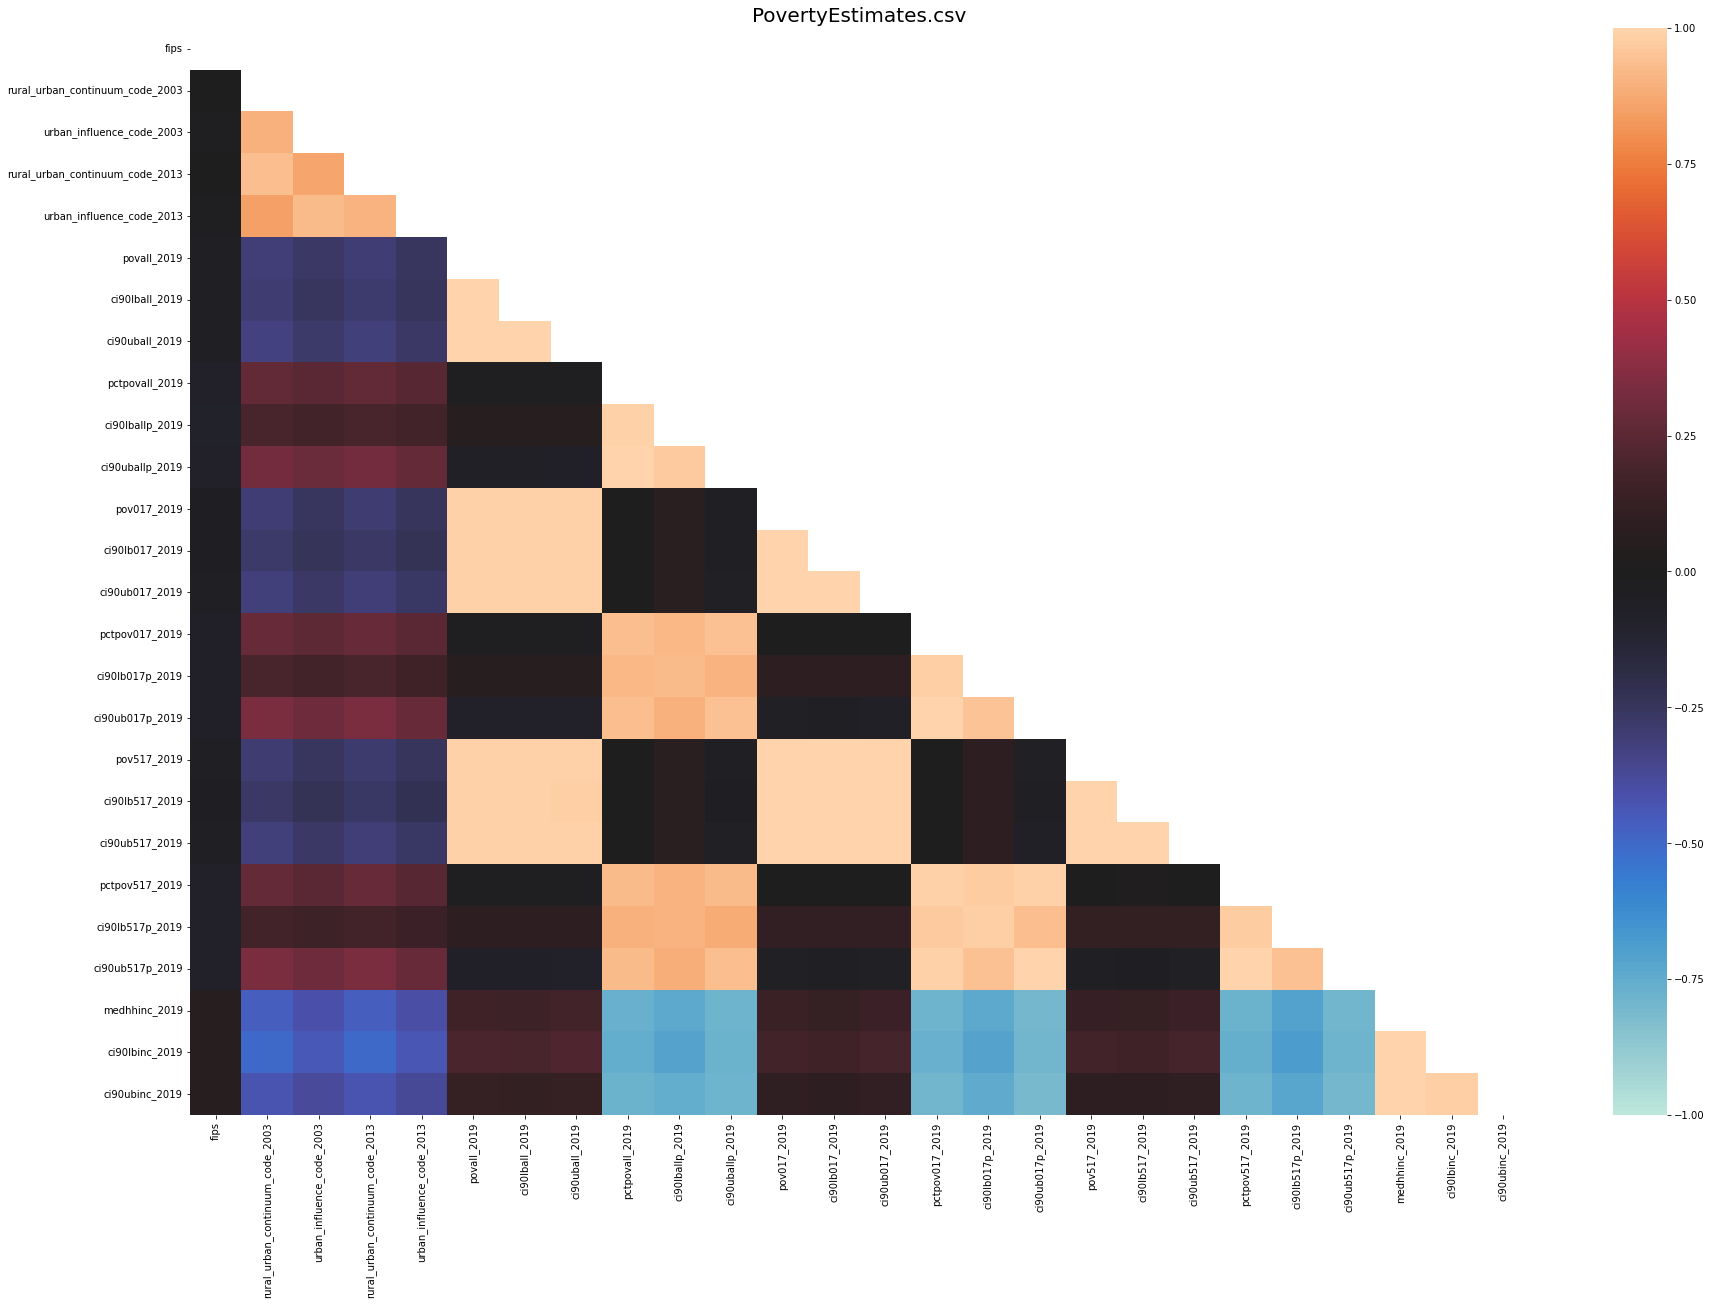

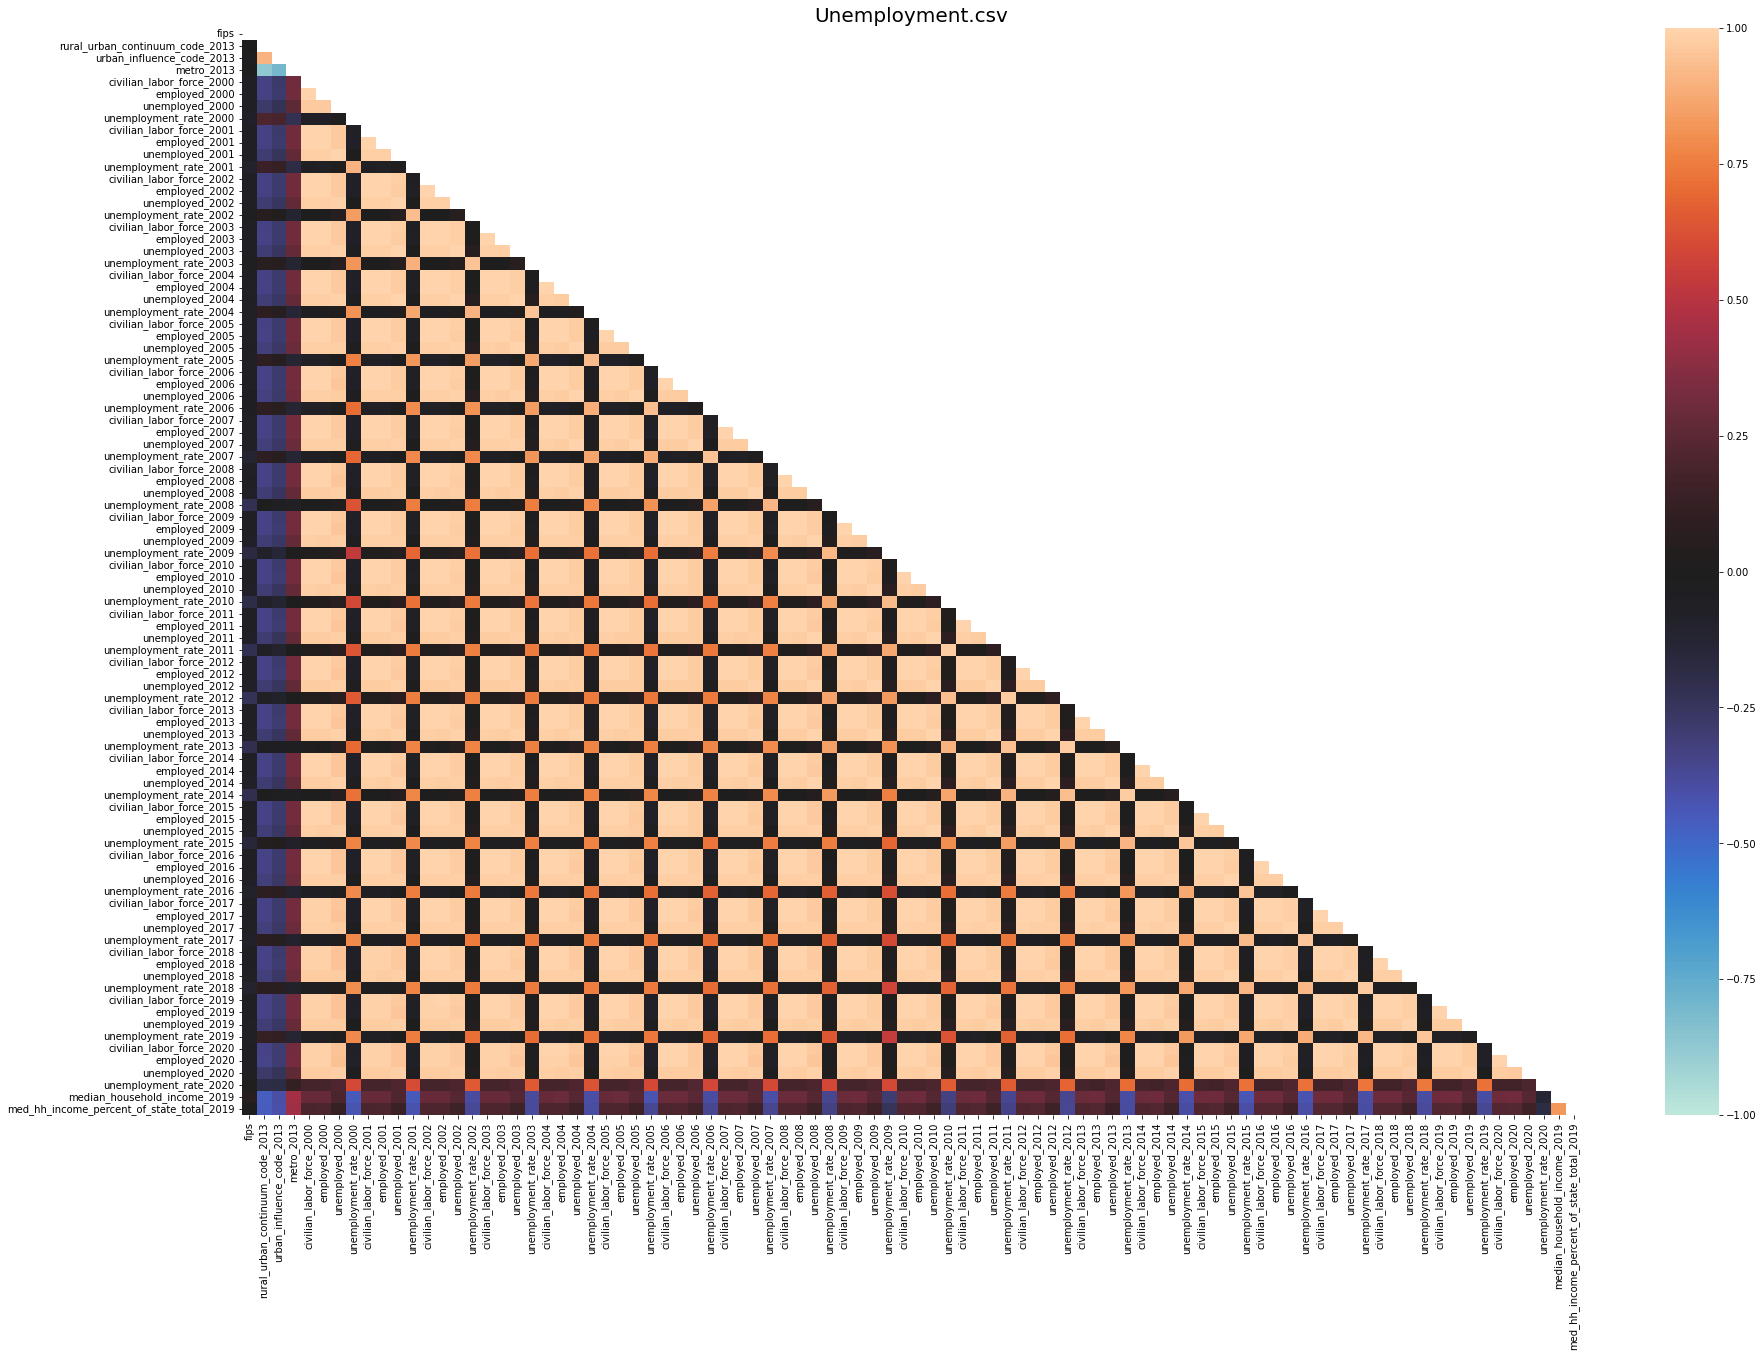

In [133]:
for file in files:
    df = pd.read_csv(file)
    df = numerical_df(df)
    show_heatmap(df, title=os.path.basename(file))

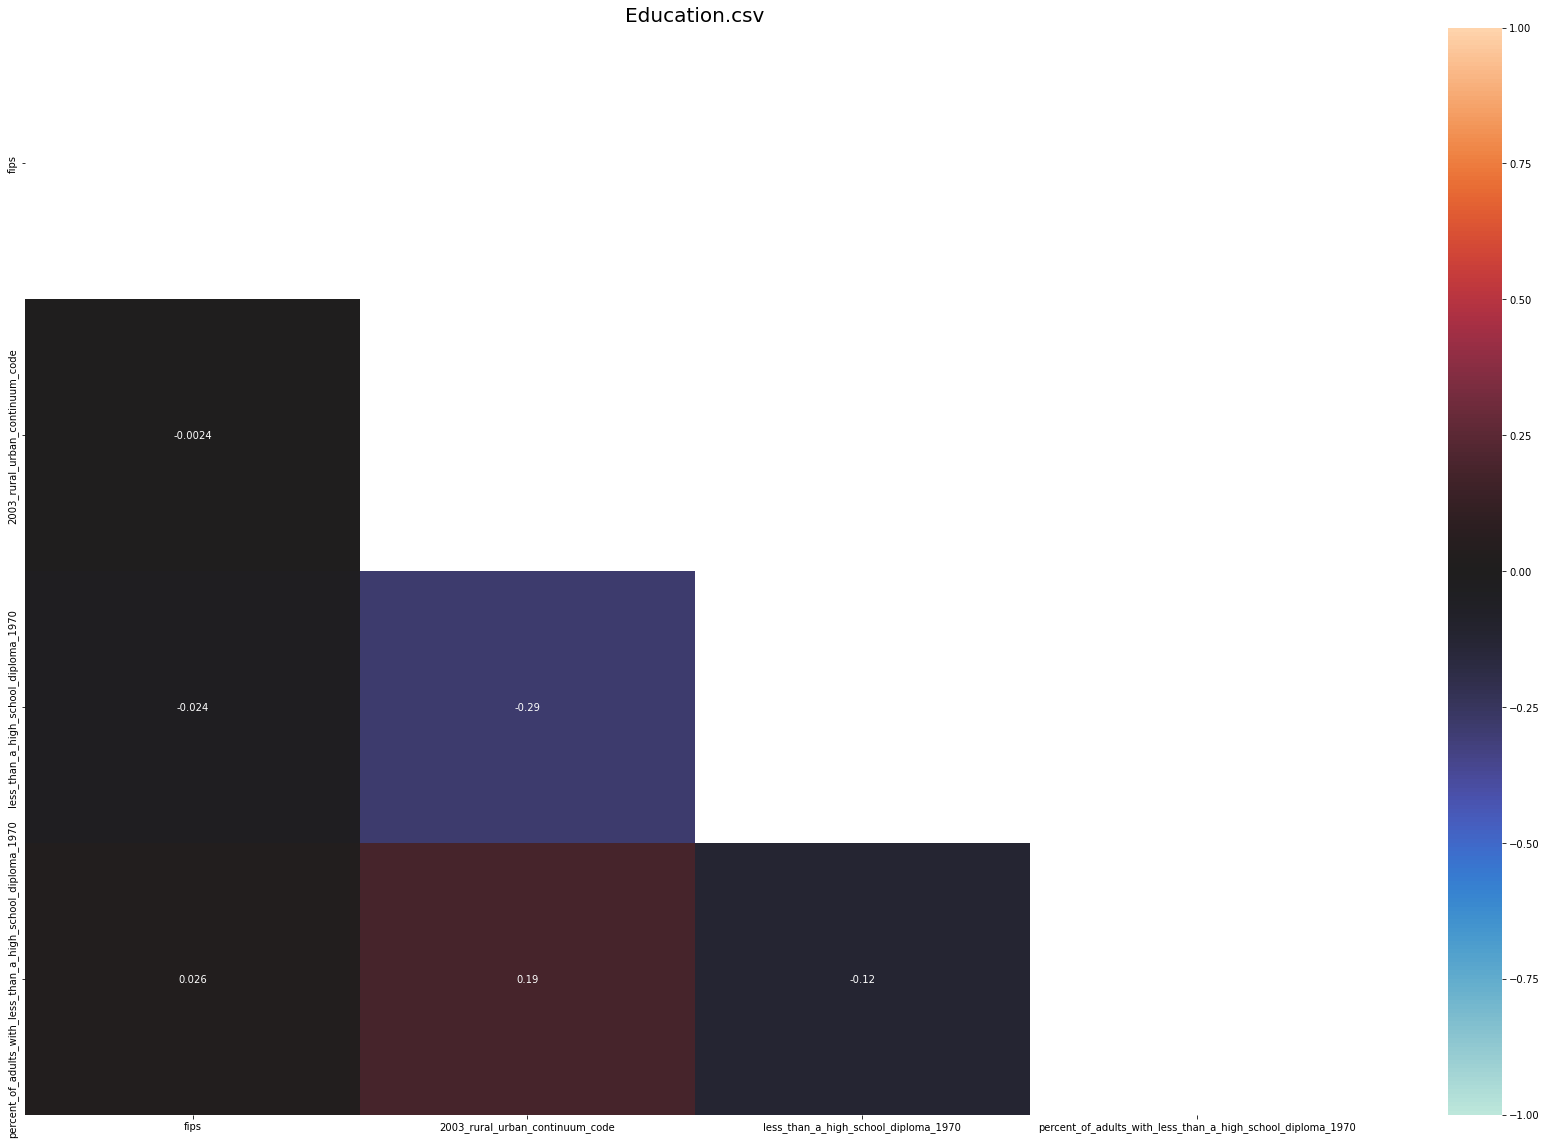

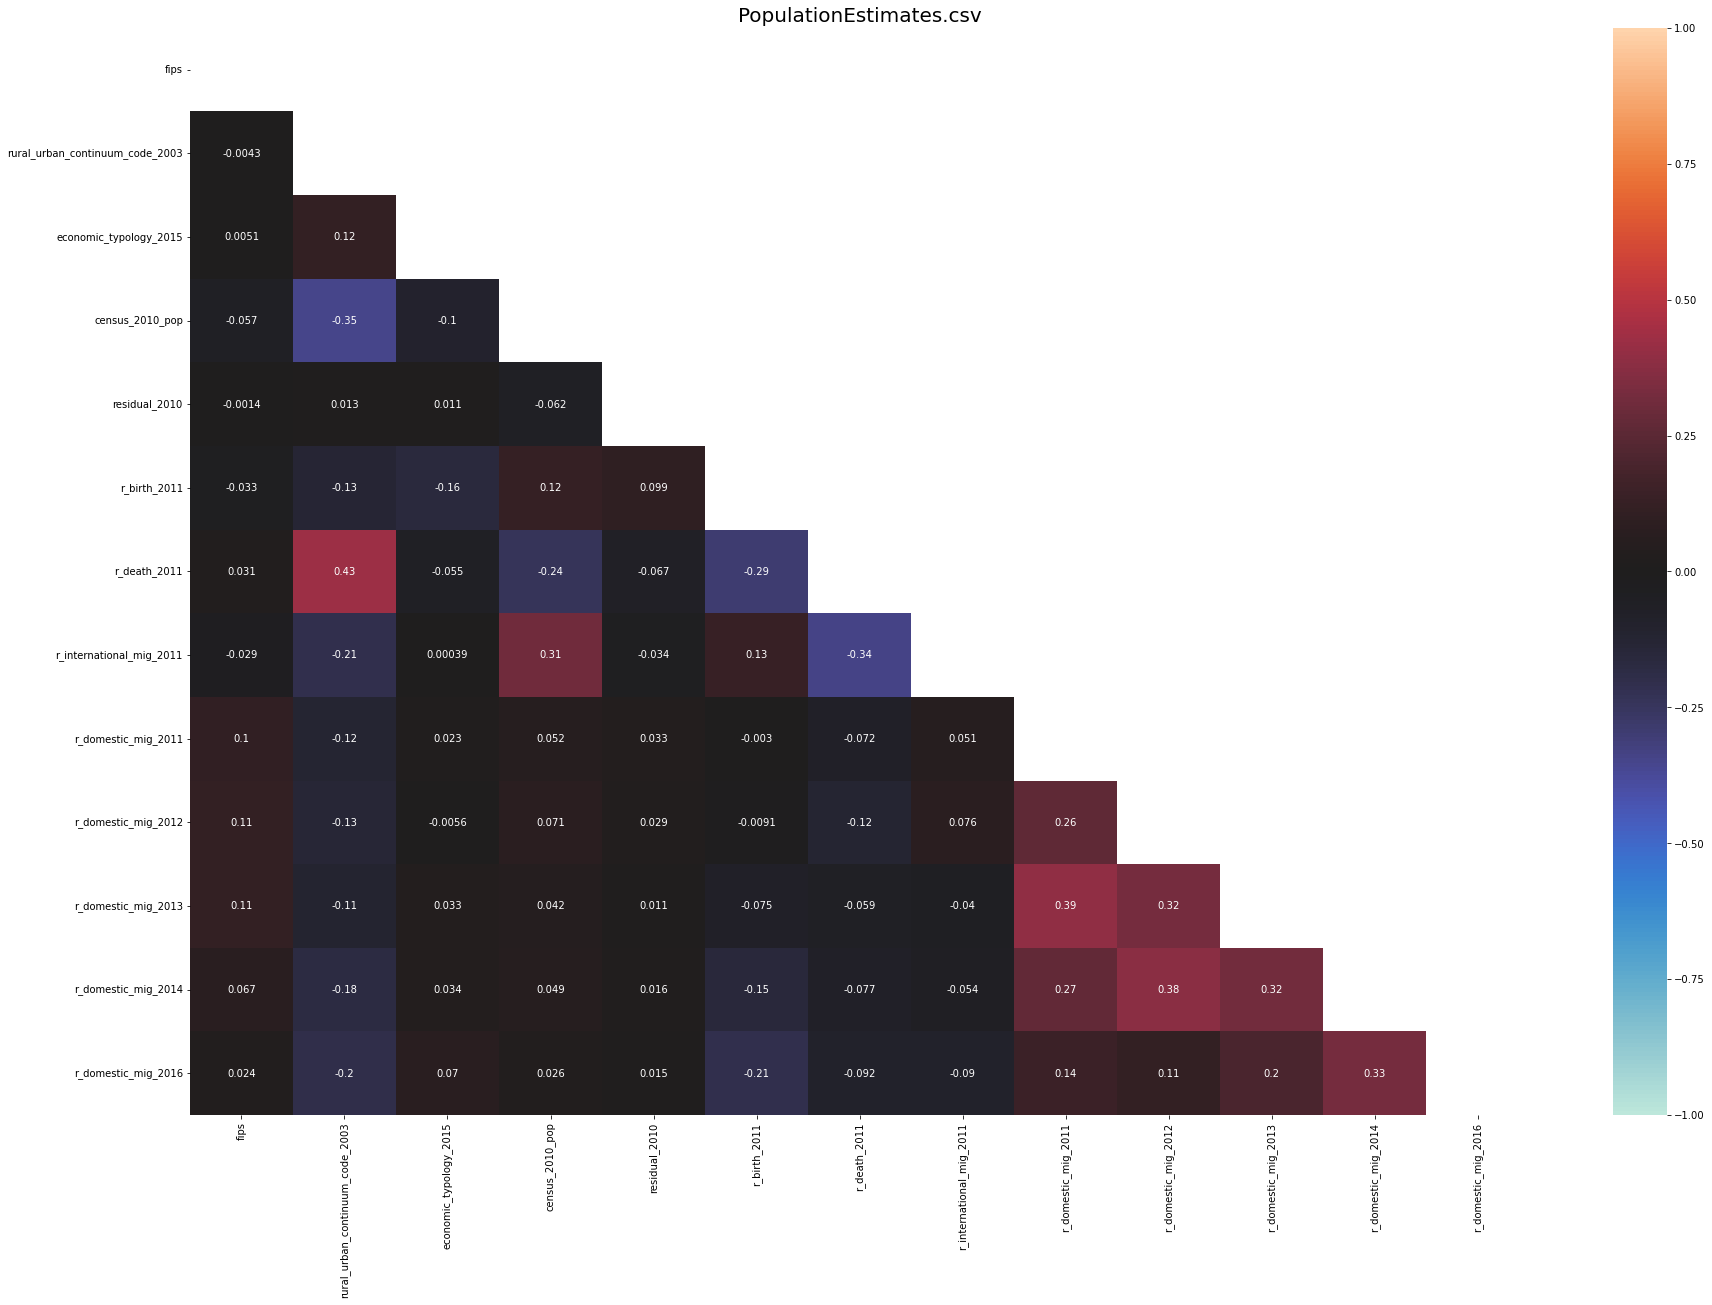

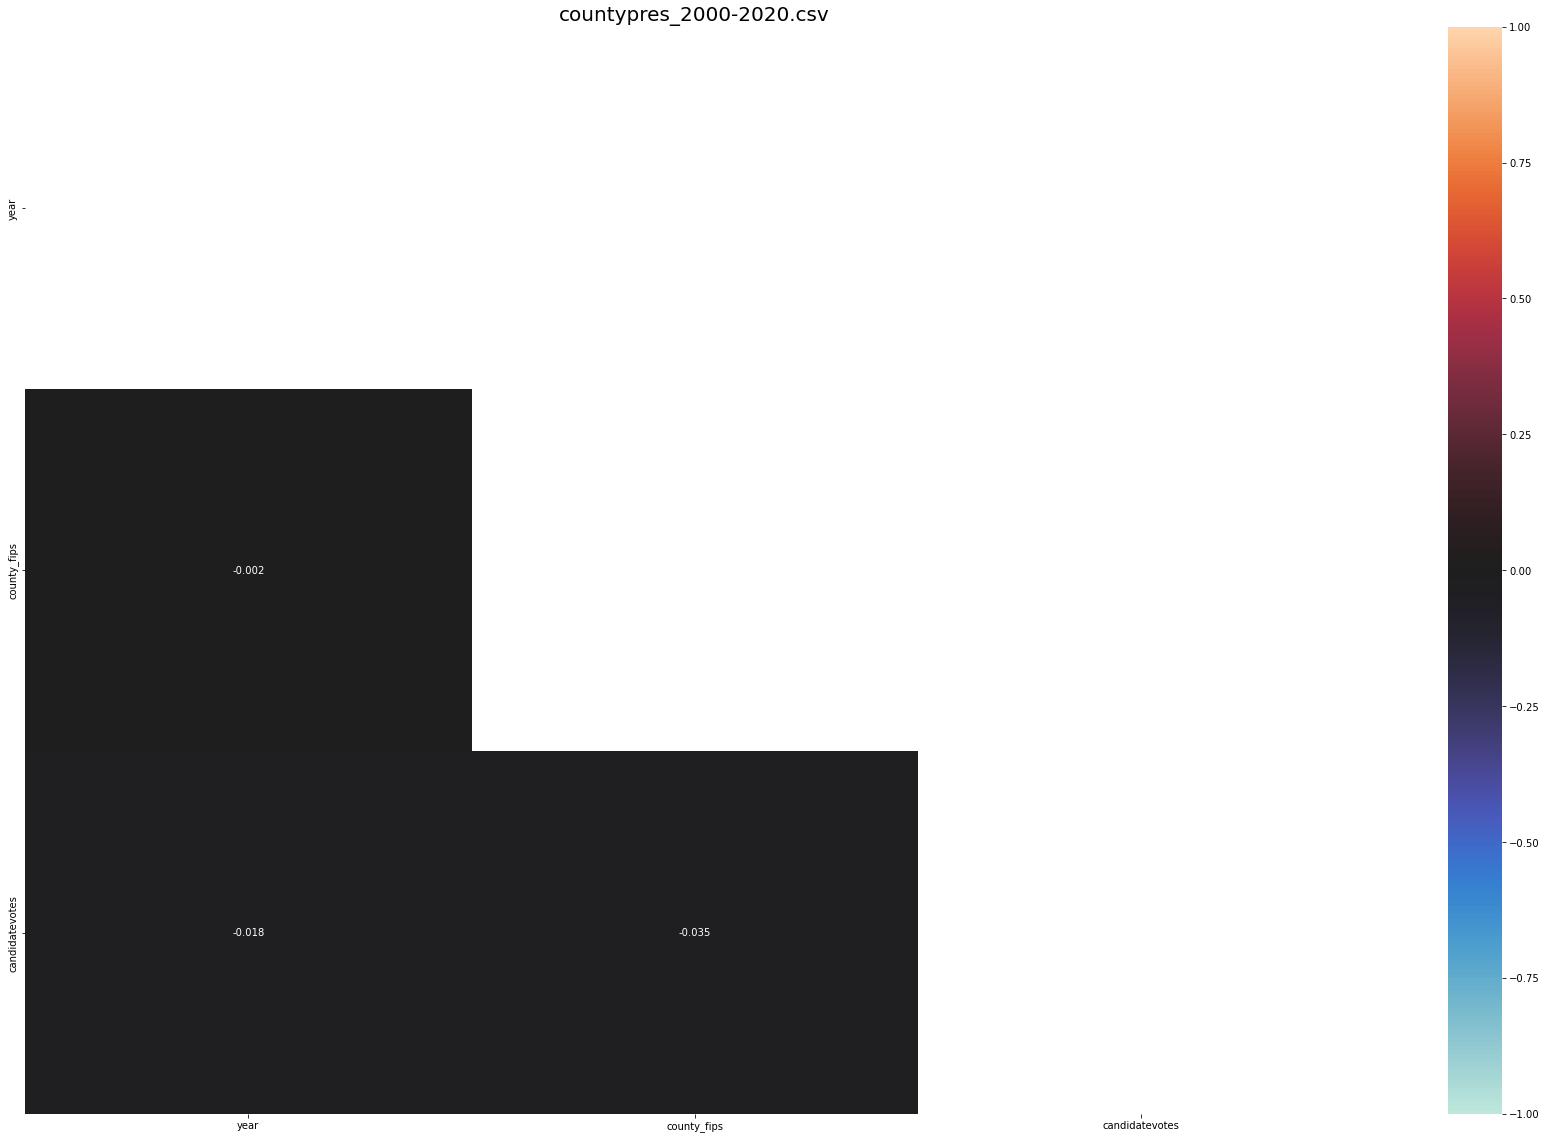

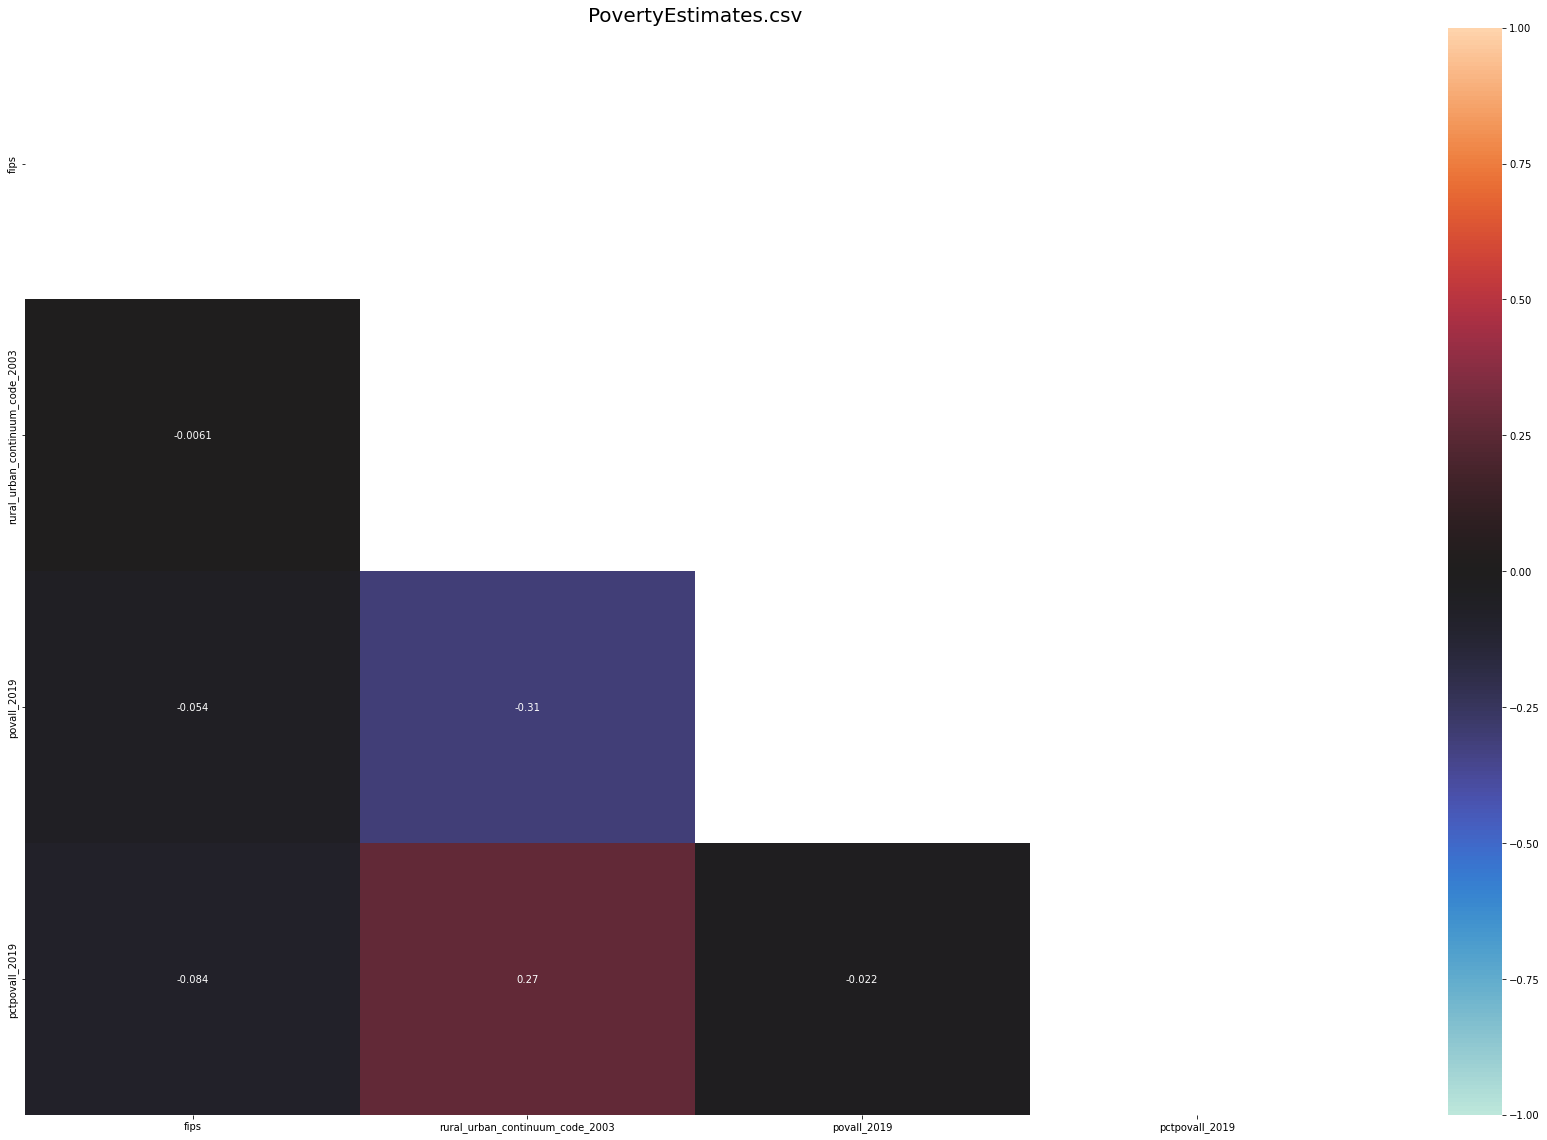

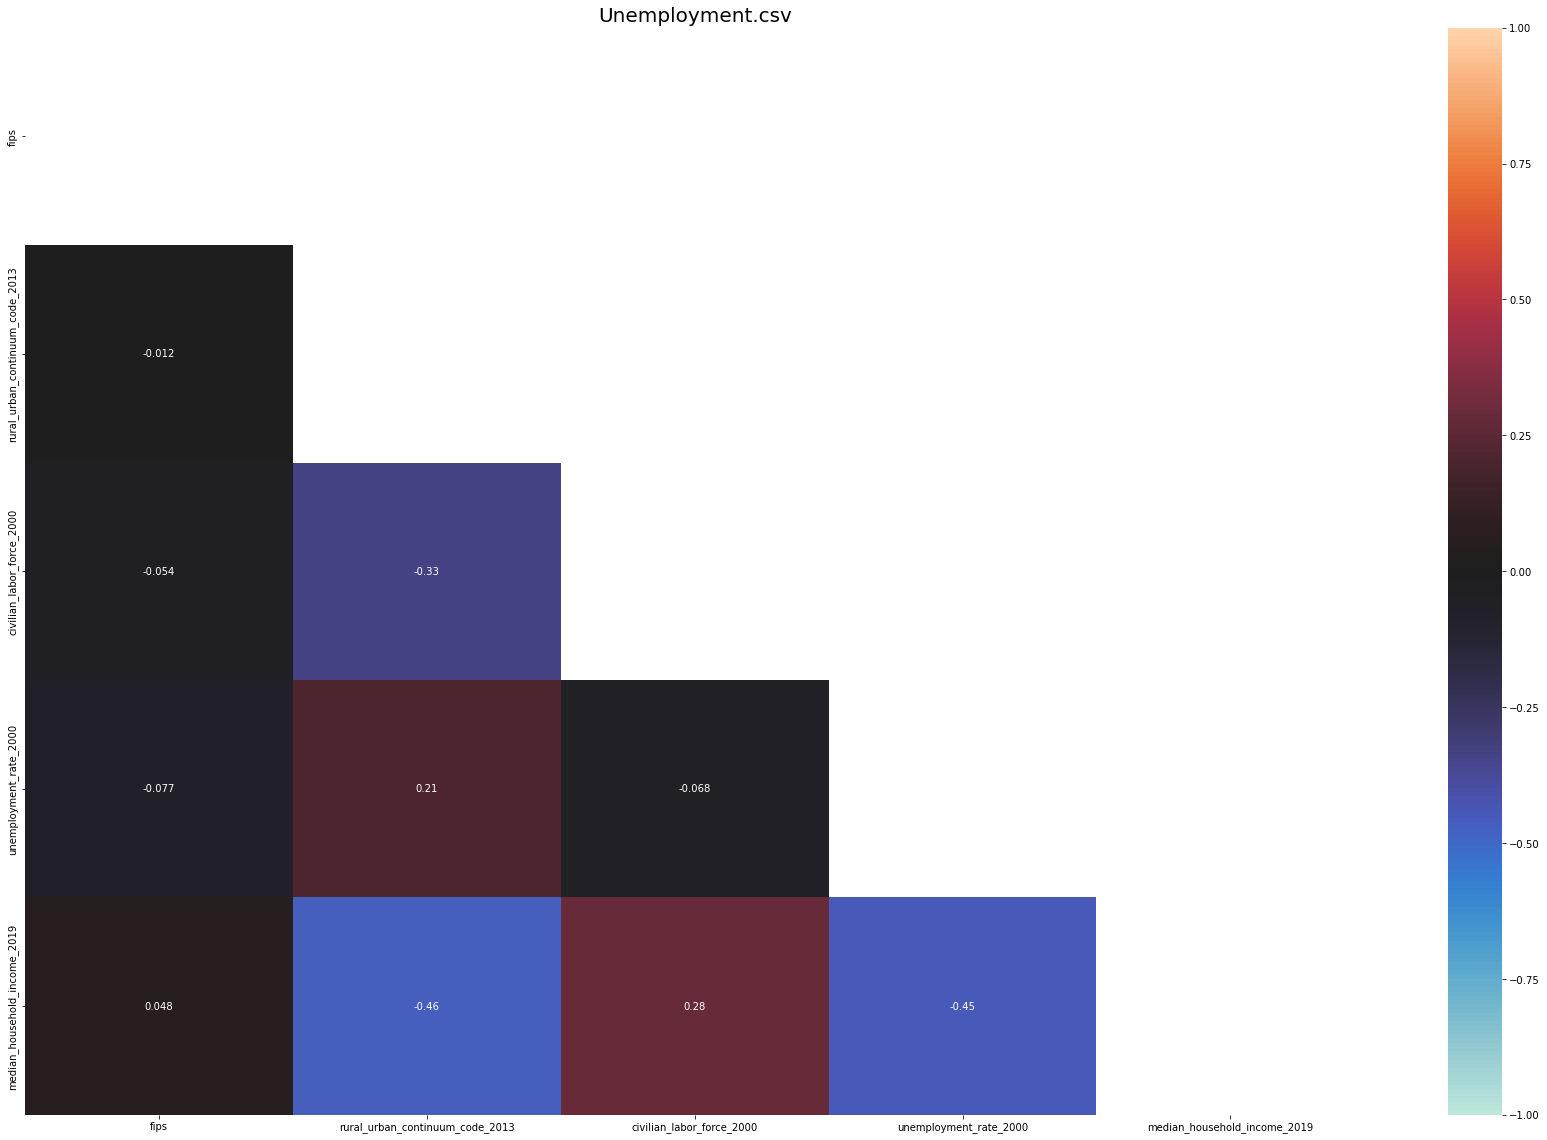

In [134]:
for file in files:
    df = pd.read_csv(file)
    df = numerical_df(df)
    df = remove_correlated_columns(df, threshold=0.5)
    show_heatmap(df, title=os.path.basename(file), annot=True)
    df.to_csv(os.path.join(PREPROCESSED_FOLDER, "clean_" + os.path.basename(file)), index=False)